In [22]:
from thesis_tools.utils.data import *

In [23]:
from thesis_tools.utils.data import *
# Read data
df = read_billionaires_data()
# filter US 2018
df = df[(df['country_of_citizenship'] == 'United States') & (df['year'] == '2018')]
df['excesses'] = df['net_worth'] - 1
Y = df['net_worth'].values

# Pareto

In [24]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

In [25]:
basic_pareto_model = pm.Model()

with basic_pareto_model:
    # Priors for unknown model parameters
    alpha_basic_pareto = pm.Gamma("alpha", alpha=2, beta=2)

    # Likelihood (sampling distribution) of observations
    Y_obs_basic_pareto = pm.Pareto("Y_obs", alpha=alpha_basic_pareto, m=1, observed=Y)

In [26]:
# Inference
with basic_pareto_model:
    posterior_samples = pm.sample(nuts_sampler='nutpie')

In [29]:
temp_df = az.summary(posterior_samples)
# make this a dict
temp_df = temp_df.to_dict()

In [30]:
temp_df

{'mean': {'alpha': 0.866, 'alpha_log__': -0.145},
 'sd': {'alpha': 0.036, 'alpha_log__': 0.041},
 'hdi_3%': {'alpha': 0.799, 'alpha_log__': -0.221},
 'hdi_97%': {'alpha': 0.933, 'alpha_log__': -0.065},
 'mcse_mean': {'alpha': 0.001, 'alpha_log__': 0.001},
 'mcse_sd': {'alpha': 0.001, 'alpha_log__': 0.001},
 'ess_bulk': {'alpha': 1709.0, 'alpha_log__': 1709.0},
 'ess_tail': {'alpha': 2724.0, 'alpha_log__': 2724.0},
 'r_hat': {'alpha': 1.0, 'alpha_log__': 1.0}}

In [10]:
# Sample from the prior
with basic_pareto_model:
    prior_samples = pm.sample_prior_predictive(samples=1000)

Sampling: [Y_obs, alpha]


In [13]:
pm.summary(posterior_samples)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha        0.866  0.037   0.795    0.932      0.001    0.001    1562.0   
alpha_log__ -0.145  0.043  -0.229   -0.070      0.001    0.001    1562.0   

             ess_tail  r_hat  
alpha          2721.0    1.0  
alpha_log__    2721.0    1.0

In [14]:
# Sample from the posterior predictive
with basic_pareto_model:
    posterior_predictive = pm.sample_posterior_predictive(posterior_samples)

Sampling: [Y_obs]


Output()

In [15]:
pm.summary(posterior_predictive)

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/stats/stats.py:1338: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


mean        sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Y_obs[0]    19.921   257.991   1.000   25.148      4.064    2.878    3777.0   
Y_obs[1]    27.910   479.249   1.000   24.482      7.559    5.346    3881.0   
Y_obs[2]    30.679   504.275   1.001   29.476      8.170    5.777    4065.0   
Y_obs[3]    20.152   241.229   1.000   22.358      3.791    2.689    4100.0   
Y_obs[4]    53.241  1284.052   1.000   25.818     20.237   14.325    3835.0   
...            ...       ...     ...      ...        ...      ...       ...   
Y_obs[581]  39.862  1305.452   1.000   25.404     20.589   14.567    3946.0   
Y_obs[582]  34.136   953.133   1.000   28.505     15.029   10.635    3944.0   
Y_obs[583]  16.132   191.567   1.000   26.884      3.012    2.137    3961.0   
Y_obs[584]  71.783  3358.749   1.000   27.894     52.991   37.479    3512.0   
Y_obs[585]  18.839   204.234   1.001   27.754      3.210    2.277    3927.0   

            ess_tail  r_hat  
Y_obs[0]      3888.0    1.0  
Y_obs[1]      3874.0    1.0  
Y_obs[2]      3683.0    1.0  
Y_obs[3]      4101.0    1.0  
Y_obs[4]      3892.0    1.0  
...              ...    ...  
Y_obs[581]    3930.0    1.0  
Y_obs[582]    3735.0    1.0  
Y_obs[583]    4014.0    1.0  
Y_obs[584]    3708.0    1.0  
Y_obs[585]    3875.0    1.0  

[586 rows x 9 columns]

In [19]:
temp_df = az.summary(posterior_predictive)

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/stats/stats.py:1338: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


In [20]:
# take the mean of the temp_df
temp_df = temp_df.mean()

In [21]:
temp_df

mean           55.579637
sd           2289.539502
hdi_3%          1.000188
hdi_97%        26.159263
mcse_mean      36.141899
mcse_sd        25.562795
ess_bulk     3935.046075
ess_tail     3839.651877
r_hat           1.000000
dtype: float64

In [8]:
alpha_prior = prior_samples.prior['alpha'].values.flatten()
alpha_posterior = posterior_samples.posterior['alpha'].values.flatten()

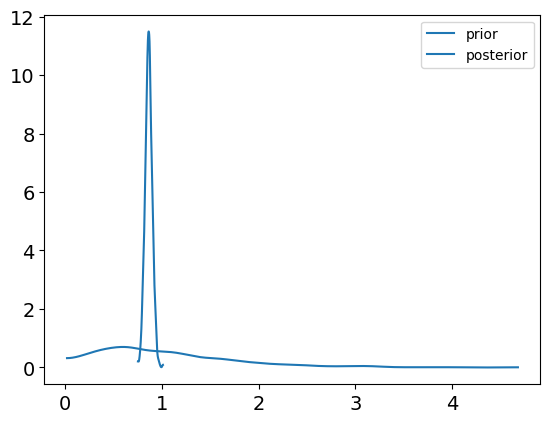

In [9]:
# Plot the prior and posterior
fig, ax = plt.subplots()
az.plot_kde(alpha_prior, label='prior', ax=ax)
az.plot_kde(alpha_posterior, label='posterior', ax=ax)
plt.legend()
plt.show()


In [10]:
Y_prior = prior_samples.prior_predictive['Y_obs'].values.flatten()
Y_posterior = posterior_predictive.posterior_predictive['Y_obs'].values.flatten()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


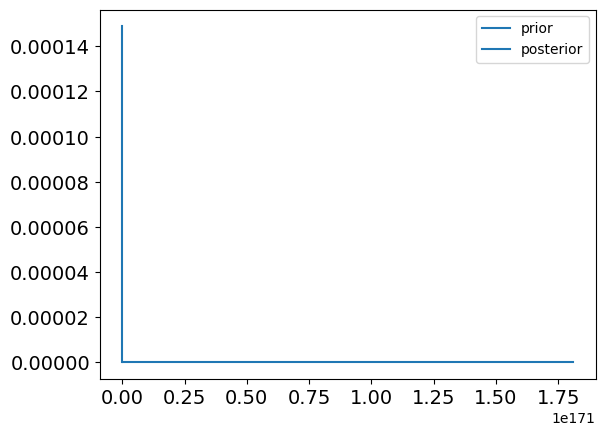

In [11]:
# Plot the prior and posterior
fig, ax = plt.subplots()
az.plot_kde(Y_prior, label='prior', ax=ax)
az.plot_kde(Y_posterior, label='posterior', ax=ax)
plt.legend()
plt.show()

# Pareto BHM

In [12]:
basic_pareto_bhm = pm.Model()

with basic_pareto_bhm:
    # Hyperpriors
    alpha_Gamma = pm.HalfNormal("alpha_Gamma", sigma=10)
    beta_Gamma = pm.HalfNormal("beta_Gamma", sigma=10)

    # Priors for unknown model parameters
    alpha = pm.Gamma("alpha", alpha=alpha_Gamma, beta=beta_Gamma)

    # Likelihood (sampling distribution) of observations
    Y_obs_bhm_pareto = pm.Pareto("Y_obs", alpha=alpha, m=1, observed=Y)

In [13]:
# Inference
with basic_pareto_bhm:
    posterior_samples_bhm = pm.sample(nuts_sampler='nutpie')

In [14]:
# Sample from the posterior predictive
with basic_pareto_bhm:
    posterior_predictive_bhm = pm.sample_posterior_predictive(posterior_samples_bhm)

Sampling: [Y_obs]


Output()

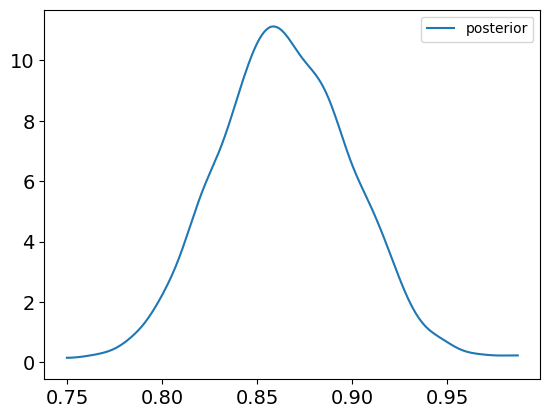

In [15]:
# Plot the prior and posterior
fig, ax = plt.subplots()
az.plot_kde(posterior_samples_bhm.posterior['alpha'].values.flatten(), label='posterior', ax=ax)
plt.legend()
plt.show()


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'alpha_Gamma'}>,
        <Axes: title={'center': 'alpha_Gamma'}>],
       [<Axes: title={'center': 'alpha_Gamma_log__'}>,
        <Axes: title={'center': 'alpha_Gamma_log__'}>],
       [<Axes: title={'center': 'alpha_log__'}>,
        <Axes: title={'center': 'alpha_log__'}>],
       [<Axes: title={'center': 'beta_Gamma'}>,
        <Axes: title={'center': 'beta_Gamma'}>],
       [<Axes: title={'center': 'beta_Gamma_log__'}>,
        <Axes: title={'center': 'beta_Gamma_log__'}>]], dtype=object)

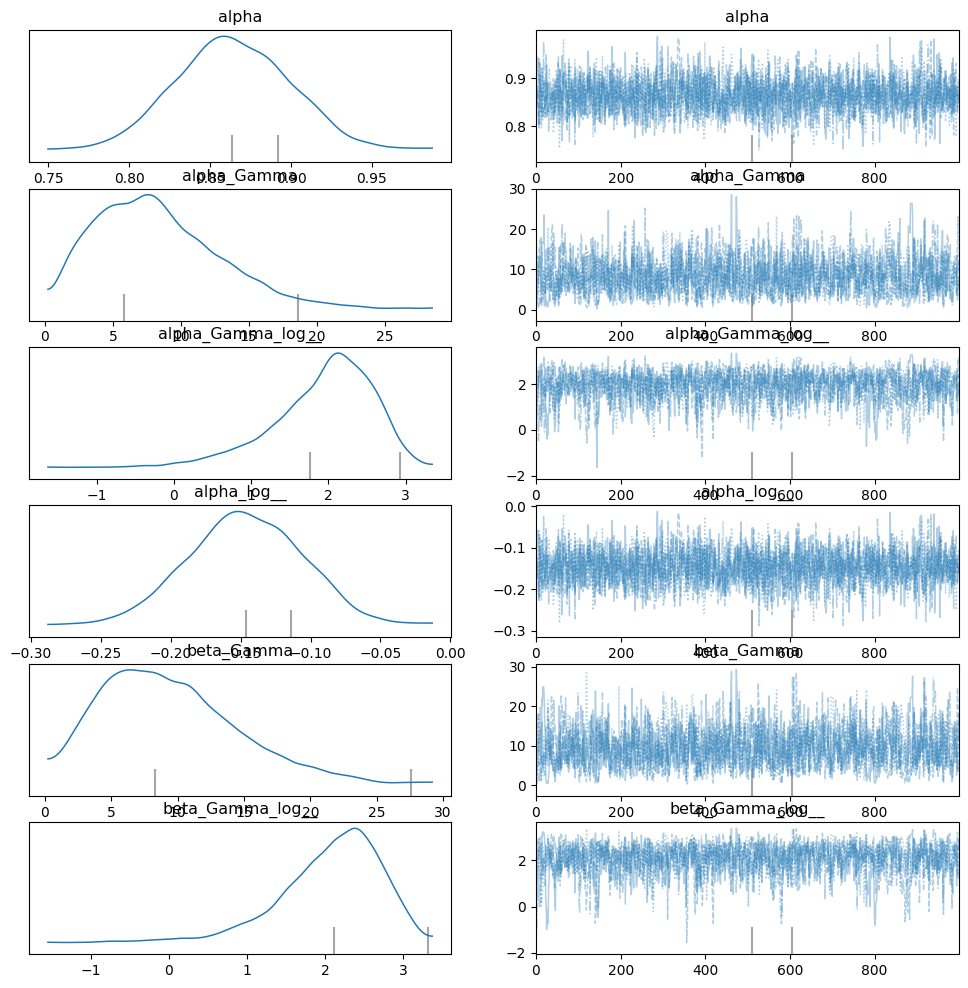

In [16]:
az.plot_trace(posterior_samples_bhm, combined=True)

In [17]:
posterior_predictive_bhm_Y = posterior_predictive_bhm.posterior_predictive['Y_obs'].values.flatten()

In [18]:
vals = posterior_predictive_bhm.posterior_predictive['Y_obs'].values.flatten()

In [19]:
sorted_vals = np.sort(vals)

In [20]:
# get the 95% credible interval
np.percentile(sorted_vals, 2.5), np.percentile(sorted_vals, 97.5)

(1.02975179400004, 72.2577954276763)

In [21]:
log_vals = np.log(vals)

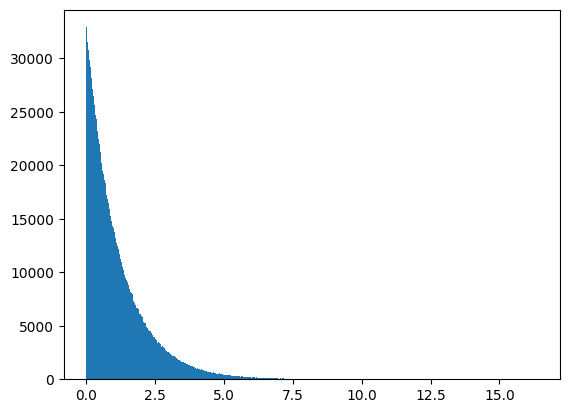

In [22]:
# plot histogram of the log values
plt.hist(log_vals, bins=1000)
plt.show()

# Weibull BHM

In [23]:
# Make a Weibull BHM model

basic_weibull_bhm = pm.Model()

with basic_weibull_bhm:
    # Hyperpriors
    alpha_Gamma_Weibull = pm.HalfNormal("alpha_Gamma", sigma=10)
    beta_Gamma_Weibull = pm.HalfNormal("beta_Gamma", sigma=10)
    alpha_InverseGamma_Weibull = pm.HalfNormal("alpha_InverseGamma", sigma=10)
    beta_InverseGamma_Weibull = pm.HalfNormal("beta_InverseGamma", sigma=10)

    # Priors for unknown model parameters
    alpha_Weibull = pm.Gamma("alpha", alpha=alpha_Gamma_Weibull, beta=beta_Gamma_Weibull)
    beta_Weibull = pm.InverseGamma("beta", alpha=alpha_InverseGamma_Weibull, beta=beta_InverseGamma_Weibull)

    # Likelihood (sampling distribution) of observations
    Y_obs_bhm_pareto = pm.Weibull("Y_obs", alpha=alpha_Weibull, beta=beta_Weibull, observed=Y)

In [24]:
# Inference
with basic_weibull_bhm:
    posterior_samples_weibull_bhm = pm.sample(nuts_sampler='nutpie')

In [25]:
# Sample from the posterior predictive
with basic_weibull_bhm:
    posterior_predictive_weibull_bhm = pm.sample_posterior_predictive(posterior_samples_weibull_bhm)

Sampling: [Y_obs]


Output()

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'alpha_Gamma'}>,
        <Axes: title={'center': 'alpha_Gamma'}>],
       [<Axes: title={'center': 'alpha_Gamma_log__'}>,
        <Axes: title={'center': 'alpha_Gamma_log__'}>],
       [<Axes: title={'center': 'alpha_InverseGamma'}>,
        <Axes: title={'center': 'alpha_InverseGamma'}>],
       [<Axes: title={'center': 'alpha_InverseGamma_log__'}>,
        <Axes: title={'center': 'alpha_InverseGamma_log__'}>],
       [<Axes: title={'center': 'alpha_log__'}>,
        <Axes: title={'center': 'alpha_log__'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'beta_Gamma'}>,
        <Axes: title={'center': 'beta_Gamma'}>],
       [<Axes: title={'center': 'beta_Gamma_log__'}>,
        <Axes: title={'center': 'beta_Gamma_log__'}>],
       [<Axes: title={'center': 'beta_InverseGamma'}>,
        <Axes: title

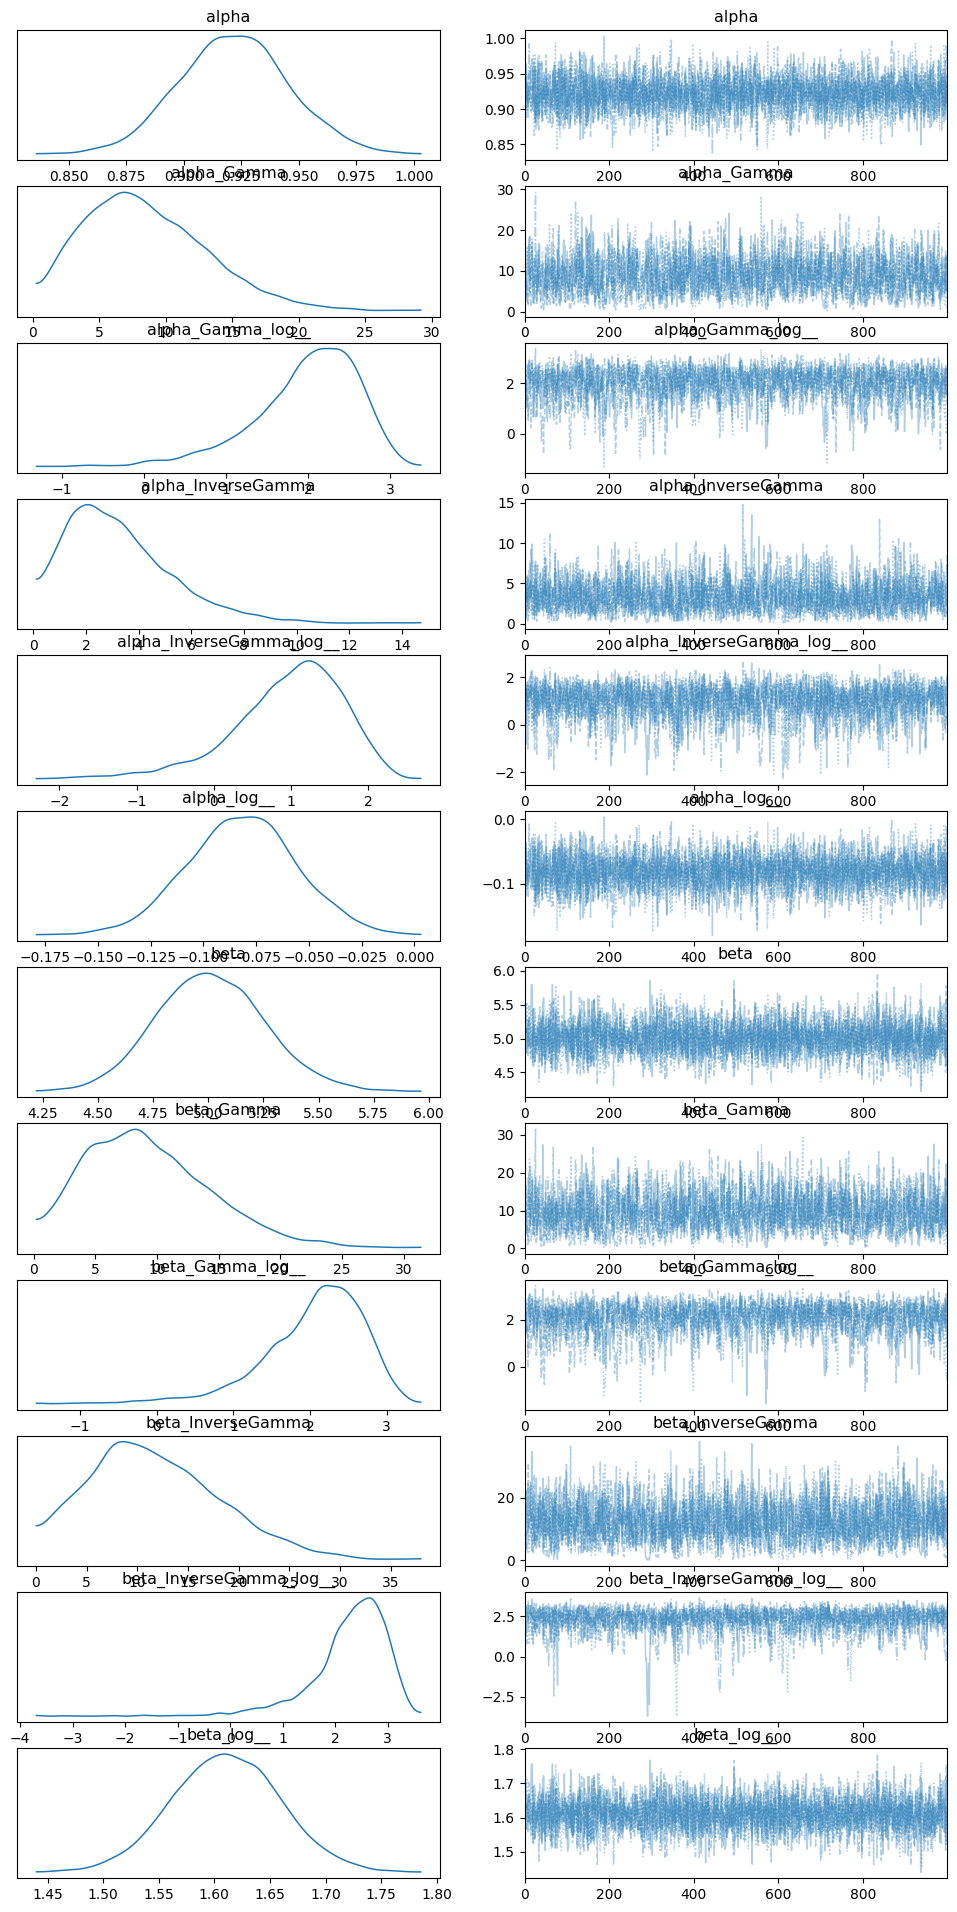

In [26]:
# Plot the parameter posteriors
az.plot_trace(posterior_samples_weibull_bhm, combined=True)

In [27]:
# get posterior predictive samples
posterior_predictive_weibull_bhm_Y = posterior_predictive_weibull_bhm.posterior_predictive['Y_obs'].values.flatten()

In [28]:
posterior_predictive_weibull_bhm_Y

array([4.0407031 , 3.954218  , 5.23882611, ..., 6.03554392, 1.6437683 ,
       1.39592309])

In [29]:
log_weibull_vals = np.log(posterior_predictive_weibull_bhm_Y)

(array([4.80911e+05, 3.45566e+05, 2.71184e+05, 2.17932e+05, 1.76351e+05,
        1.43582e+05, 1.18425e+05, 9.76170e+04, 8.02820e+04, 6.67940e+04,
        5.55050e+04, 4.61250e+04, 3.88340e+04, 3.22250e+04, 2.72440e+04,
        2.26740e+04, 1.87080e+04, 1.61100e+04, 1.33550e+04, 1.15800e+04,
        9.65700e+03, 8.07800e+03, 6.86600e+03, 5.86900e+03, 4.88300e+03,
        4.18400e+03, 3.46500e+03, 3.00800e+03, 2.59700e+03, 2.16100e+03,
        1.74600e+03, 1.54200e+03, 1.31500e+03, 1.10500e+03, 9.68000e+02,
        8.07000e+02, 7.04000e+02, 5.81000e+02, 5.00000e+02, 4.17000e+02,
        3.70000e+02, 3.38000e+02, 2.59000e+02, 2.43000e+02, 2.15000e+02,
        1.78000e+02, 1.16000e+02, 1.00000e+02, 1.04000e+02, 8.60000e+01,
        6.80000e+01, 5.90000e+01, 6.00000e+01, 4.70000e+01, 4.10000e+01,
        3.60000e+01, 2.80000e+01, 2.70000e+01, 3.00000e+01, 2.20000e+01,
        1.40000e+01, 1.00000e+01, 1.80000e+01, 9.00000e+00, 6.00000e+00,
        9.00000e+00, 3.00000e+00, 5.00000e+00, 7.00

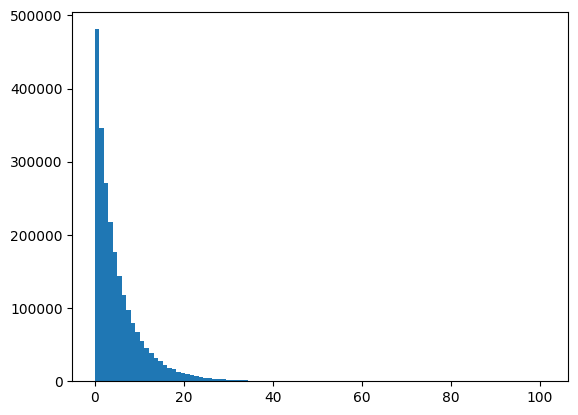

In [30]:
# Histogram of the posterior predictive samples
plt.hist(posterior_predictive_weibull_bhm_Y, bins=100)

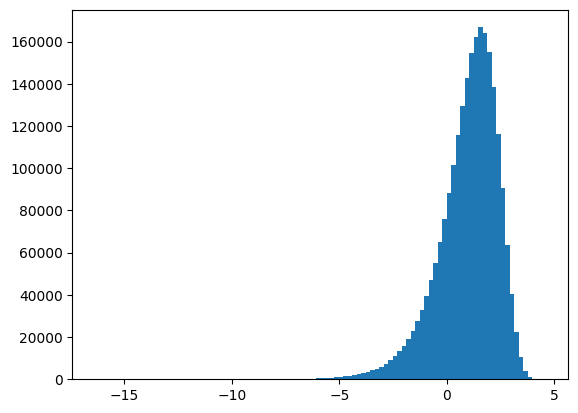

In [31]:
# Histogram of the log posterior predictive samples
plt.hist(log_weibull_vals, bins=100)
plt.show()


(array([17.,  0., 21., 15.,  0., 21.,  0., 18., 17., 22.,  0., 19.,  9.,
         6., 24., 11., 16., 10.,  8., 23., 11., 26.,  9., 24., 13., 17.,
         8., 16., 13., 16., 18.,  7.,  8., 18., 10.,  6., 13.,  9.,  4.,
         7.,  2.,  2.,  5.,  4.,  5.,  4.,  3.,  3.,  2.,  1.,  1.,  2.,
         0.,  2.,  4.,  4.,  1.,  1.,  2.,  2.,  1.,  0.,  1.,  4.,  0.,
         1.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  4.,  2.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.04718499, 0.09436998, 0.14155497, 0.18873995,
        0.23592494, 0.28310993, 0.33029492, 0.37747991, 0.4246649 ,
        0.47184989, 0.51903488, 0.56621986, 0.61340485, 0.66058984,
        0.70777483, 0.75495982, 0.80214481, 0.8493298 , 0.89651479,
        0.94369977, 0.99088476, 1.03806975, 1.08525474, 1.13243973,
        1.17962472, 1.22680971, 1.2739947 , 1.32117968, 1.36836467,
        1.41554966, 1.4627

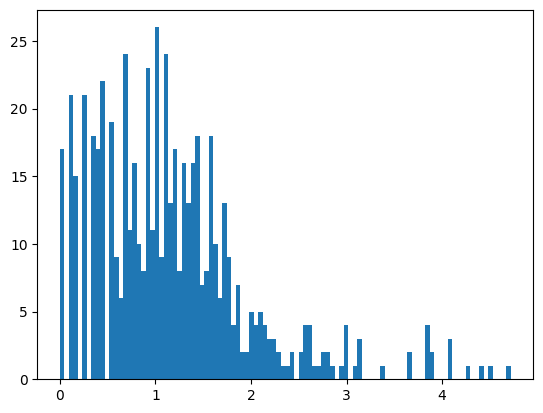

In [32]:
# plot the log wealth
plt.hist(np.log(Y), bins=100)

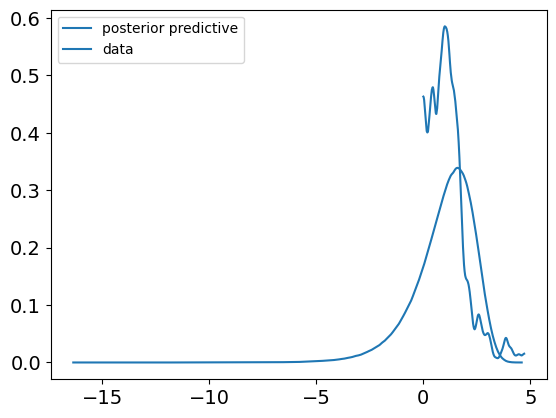

In [33]:
# plot kernel density estimate of the log wealth data and posterior predictive samples
az.plot_kde(log_weibull_vals, label='posterior predictive')
az.plot_kde(np.log(Y), label='data')
plt.legend()
plt.show()

In [34]:
df = read_billionaires_data()

In [35]:
vals = sorted(df['net_worth'].values)

In [36]:
vals

[0.6,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'alpha_Gamma'}>,
        <Axes: title={'center': 'alpha_Gamma'}>],
       [<Axes: title={'center': 'alpha_Gamma_log__'}>,
        <Axes: title={'center': 'alpha_Gamma_log__'}>],
       [<Axes: title={'center': 'alpha_InverseGamma'}>,
        <Axes: title={'center': 'alpha_InverseGamma'}>],
       [<Axes: title={'center': 'alpha_InverseGamma_log__'}>,
        <Axes: title={'center': 'alpha_InverseGamma_log__'}>],
       [<Axes: title={'center': 'alpha_log__'}>,
        <Axes: title={'center': 'alpha_log__'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'beta_Gamma'}>,
        <Axes: title={'center': 'beta_Gamma'}>],
       [<Axes: title={'center': 'beta_Gamma_log__'}>,
        <Axes: title={'center': 'beta_Gamma_log__'}>],
       [<Axes: title={'center': 'beta_InverseGamma'}>,
        <Axes: title

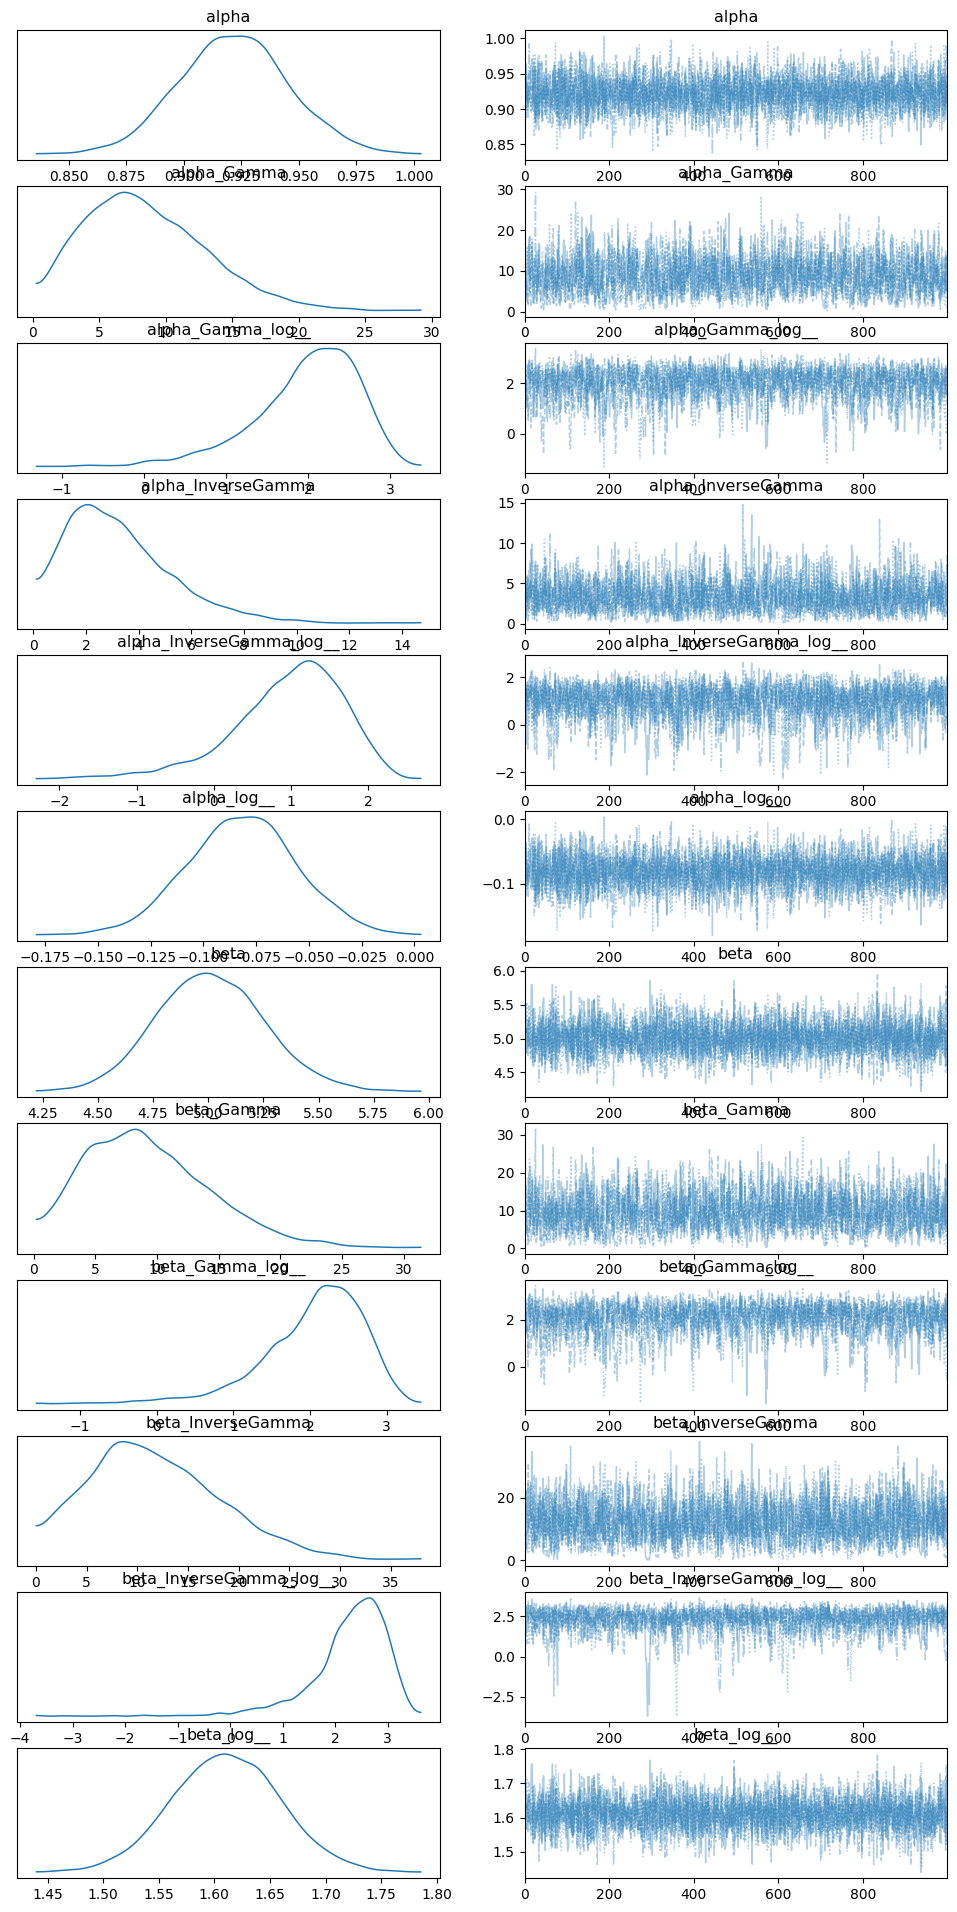

In [41]:
az.plot_trace(posterior_samples_weibull_bhm, combined=True)

<Axes: >

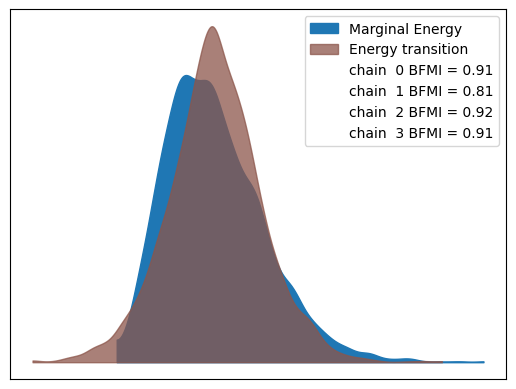

In [42]:
az.plot_energy(posterior_samples_weibull_bhm)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

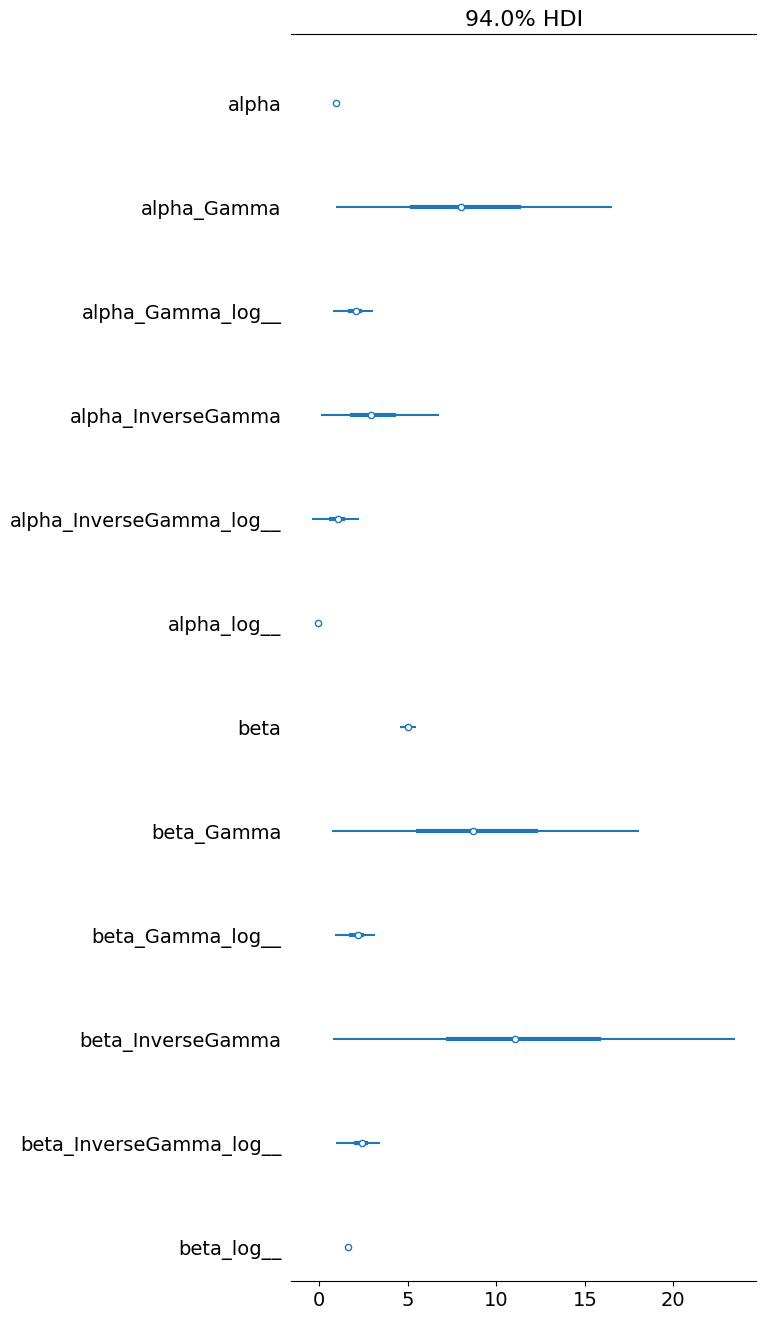

In [43]:
az.plot_forest(posterior_samples_weibull_bhm, combined=True)

# We need to work with the truncated Weibull / Gompertz here

In [1]:
from thesis_tools.utils.data import *
# Read data
df = read_billionaires_data()
# filter US 2018
df = df[(df['country_of_citizenship'] == 'United States') & (df['year'] == '2018')]
df['excesses'] = df['net_worth'] - 1
Y = df['net_worth'].values

In [2]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [41]:
truncated_weibull_model = pm.Model()

with truncated_weibull_model:
    hyperprior_alpha_1 = pm.HalfNormal("hyperprior_alpha_1", sigma=10)
    hyperprior_beta_1 = pm.HalfNormal("hyperprior_beta_1", sigma=10)
    hyperprior_alpha_2 = pm.HalfNormal("hyperprior_alpha_2", sigma=10)
    hyperprior_beta_2 = pm.HalfNormal("hyperprior_beta_2", sigma=10)
    alpha_Weibull = pm.Gamma("alpha", alpha=hyperprior_alpha_1, beta=hyperprior_beta_1)
    beta_Weibull = pm.InverseGamma("beta", alpha=hyperprior_alpha_2, beta=hyperprior_beta_2)
    weibull = pm.Weibull.dist(alpha=alpha_Weibull, beta=beta_Weibull)
    Y_obs_truncated_weibull = pm.Truncated("Y_obs", weibull, lower=1, upper=None, observed=Y)

In [42]:
with truncated_weibull_model:
    posterior_samples_truncated_weibull = pm.sample(nuts_sampler='nutpie')

In [43]:
# Sample from the posterior predictive
with truncated_weibull_model:
    posterior_predictive_truncated_weibull = pm.sample_posterior_predictive(posterior_samples_truncated_weibull)

Sampling: [Y_obs]


Output()

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'alpha_log__'}>,
        <Axes: title={'center': 'alpha_log__'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'beta_log__'}>,
        <Axes: title={'center': 'beta_log__'}>],
       [<Axes: title={'center': 'hyperprior_alpha_1'}>,
        <Axes: title={'center': 'hyperprior_alpha_1'}>],
       [<Axes: title={'center': 'hyperprior_alpha_1_log__'}>,
        <Axes: title={'center': 'hyperprior_alpha_1_log__'}>],
       [<Axes: title={'center': 'hyperprior_alpha_2'}>,
        <Axes: title={'center': 'hyperprior_alpha_2'}>],
       [<Axes: title={'center': 'hyperprior_alpha_2_log__'}>,
        <Axes: title={'center': 'hyperprior_alpha_2_log__'}>],
       [<Axes: title={'center': 'hyperprior_beta_1'}>,
        <Axes: title={'center': 'hyperprior_beta_1'}>],
       [<Axes: title={'center': 'hyperprior_b

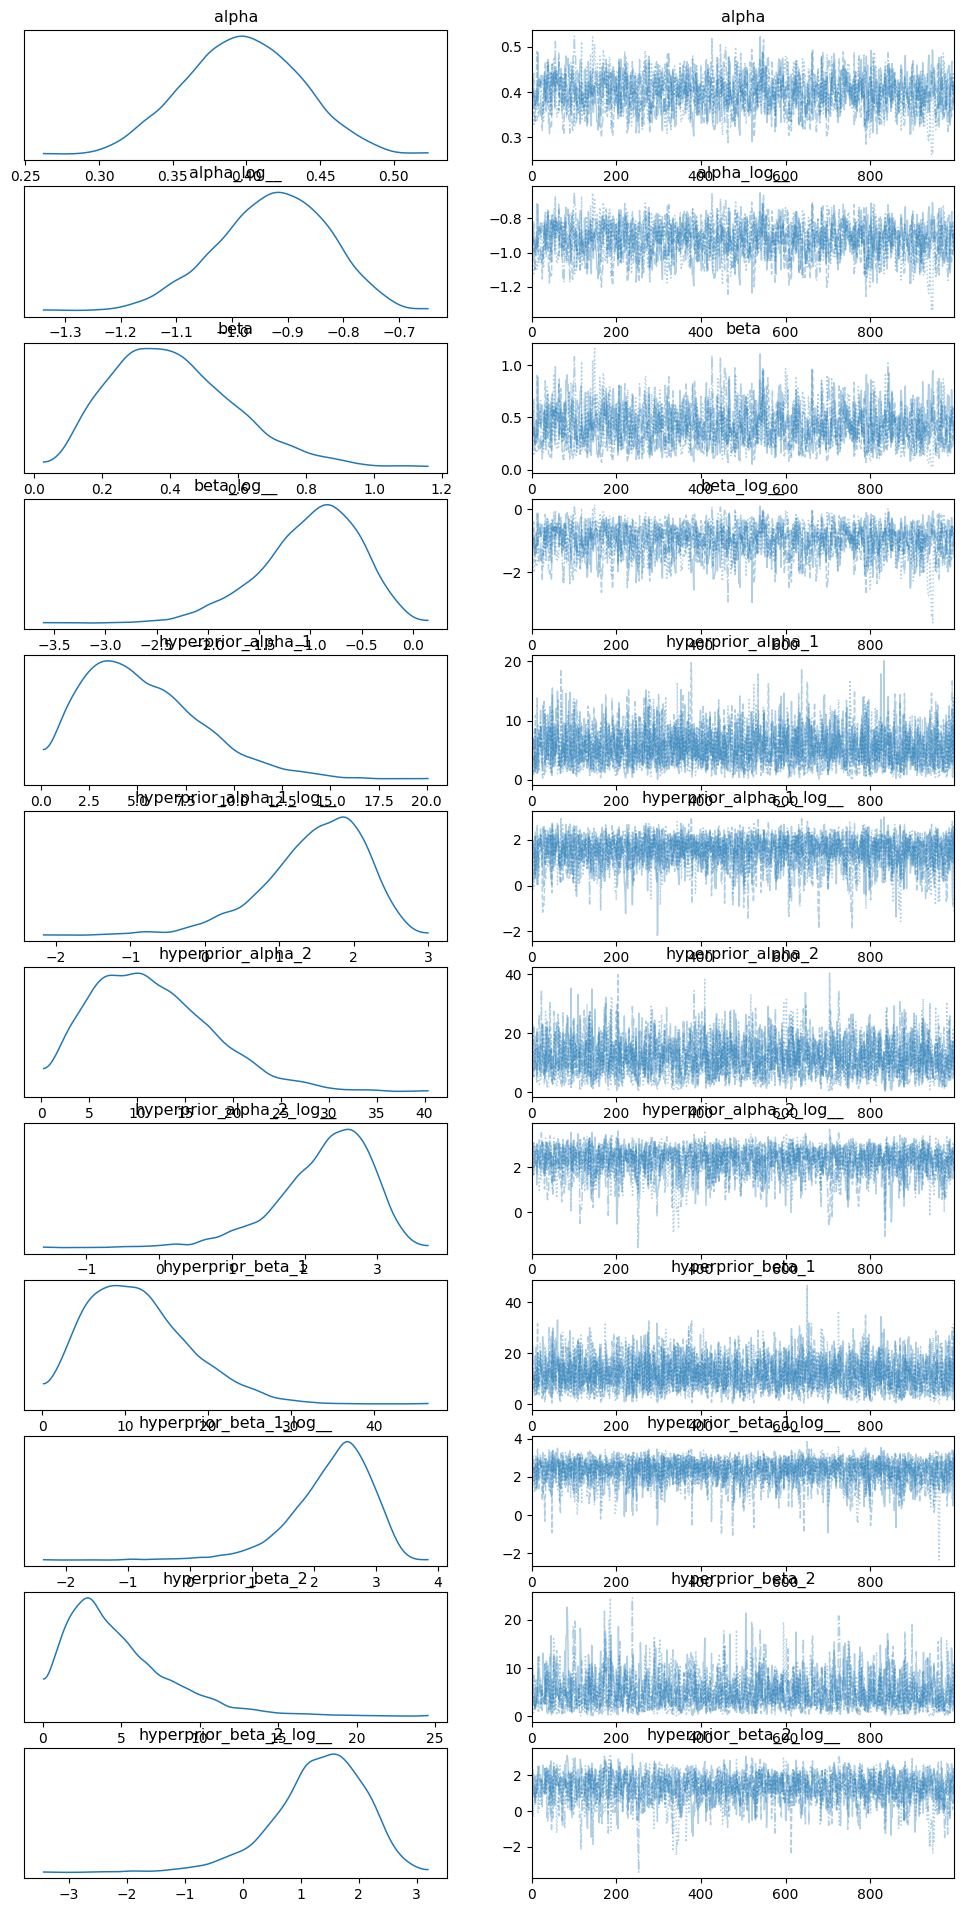

In [44]:
az.plot_trace(posterior_samples_truncated_weibull, combined=True)

In [45]:
weibull_posterior_Y = posterior_predictive_truncated_weibull.posterior_predictive['Y_obs'].values.flatten()

In [46]:
log_weibull_posterior_Y = np.log(weibull_posterior_Y)

(array([9.0507e+04, 8.9604e+04, 8.8335e+04, 8.7293e+04, 8.5643e+04,
        8.4231e+04, 8.2416e+04, 8.0670e+04, 7.8956e+04, 7.7320e+04,
        7.5613e+04, 7.3424e+04, 7.0981e+04, 6.9439e+04, 6.7214e+04,
        6.5351e+04, 6.3039e+04, 6.1318e+04, 5.8511e+04, 5.7190e+04,
        5.4841e+04, 5.2242e+04, 4.9832e+04, 4.7648e+04, 4.6086e+04,
        4.3186e+04, 4.1230e+04, 3.8941e+04, 3.6981e+04, 3.4732e+04,
        3.3002e+04, 3.0740e+04, 2.9021e+04, 2.7238e+04, 2.5084e+04,
        2.3448e+04, 2.1818e+04, 2.0335e+04, 1.8607e+04, 1.7079e+04,
        1.5615e+04, 1.4206e+04, 1.2949e+04, 1.1956e+04, 1.0677e+04,
        9.6190e+03, 8.7170e+03, 7.9260e+03, 6.9610e+03, 6.2130e+03,
        5.6540e+03, 4.8680e+03, 4.2480e+03, 3.7420e+03, 3.2810e+03,
        2.7890e+03, 2.3940e+03, 2.1010e+03, 1.8440e+03, 1.5390e+03,
        1.2970e+03, 1.1760e+03, 9.3900e+02, 7.9700e+02, 6.7400e+02,
        4.8100e+02, 3.6900e+02, 3.6300e+02, 2.8800e+02, 2.5200e+02,
        2.1000e+02, 1.4200e+02, 1.1600e+02, 1.08

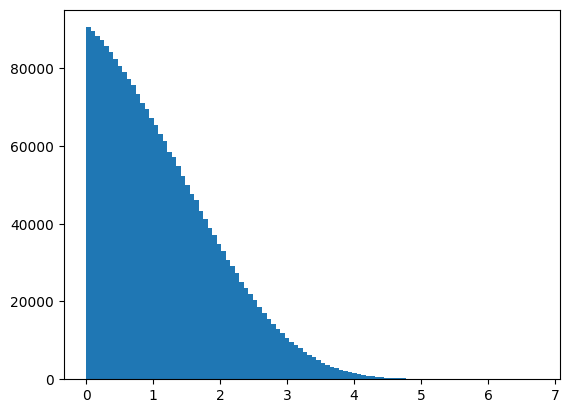

In [47]:
# Histogram of the posterior predictive samples
plt.hist(log_weibull_posterior_Y, bins=100)

In [48]:
log_Y = np.log(Y)

(array([17.,  0., 21., 15.,  0., 21.,  0., 18., 17., 22.,  0., 19.,  9.,
         6., 24., 11., 16., 10.,  8., 23., 11., 26.,  9., 24., 13., 17.,
         8., 16., 13., 16., 18.,  7.,  8., 18., 10.,  6., 13.,  9.,  4.,
         7.,  2.,  2.,  5.,  4.,  5.,  4.,  3.,  3.,  2.,  1.,  1.,  2.,
         0.,  2.,  4.,  4.,  1.,  1.,  2.,  2.,  1.,  0.,  1.,  4.,  0.,
         1.,  3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  4.,  2.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.04718499, 0.09436998, 0.14155497, 0.18873995,
        0.23592494, 0.28310993, 0.33029492, 0.37747991, 0.4246649 ,
        0.47184989, 0.51903488, 0.56621986, 0.61340485, 0.66058984,
        0.70777483, 0.75495982, 0.80214481, 0.8493298 , 0.89651479,
        0.94369977, 0.99088476, 1.03806975, 1.08525474, 1.13243973,
        1.17962472, 1.22680971, 1.2739947 , 1.32117968, 1.36836467,
        1.41554966, 1.4627

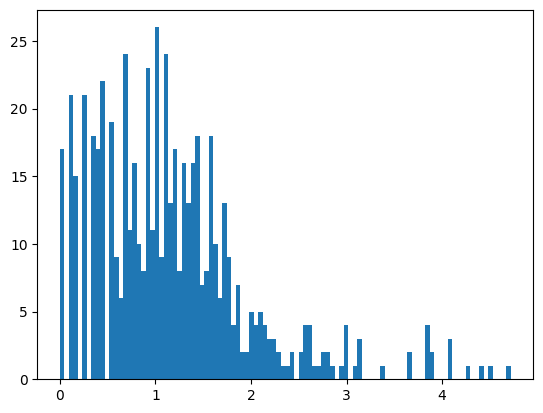

In [49]:
# histogram of the log data
plt.hist(log_Y, bins=100)

In [50]:
np.mean(weibull_posterior_Y)

5.069015410127912